<a href="https://colab.research.google.com/github/divakar9819/Brain_Tumor_classification_project/blob/master/FeedforwardNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors 
from IPython.display import HTML
import imageio
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from tqdm import tqdm_notebook
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Feedforward Neural Network

In [0]:
class FeedforwardNN:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.w7 = np.random.randn()
        self.w8 = np.random.randn()
        self.w9 = np.random.randn()
        self.w10 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1 , self.x2 = x
        
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        
        self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
        self.h4 = self.sigmoid(self.a4)
        
        self.a5 = self.w9*self.h3 + self.w10*self.h4 + self.b5
        self.h5 = self.sigmoid(self.a5)
        return self.h5
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dw9 =  (self.h5-y)*self.h5*(1-self.h5)*self.h3
        self.dw10 = (self.h5-y)*self.h5*(1-self.h5)*self.h4
        self.db5 = (self.h5-y)*self.h5*(1-self.h5)
        
        self.dw5 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)*self.h1
        self.dw6 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)*self.h2
        self.db3 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)
        
        self.dw7 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)*self.h1
        self.dw8 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)*self.h2
        self.db4 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)
        
        self.dw1 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)*self.x1 
        self.dw2 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)*self.x2
        self.db1=  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)
        
        self.dw3 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)*self.x1
        self.dw4 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)*self.x2
        self.db2 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)
        
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=True):
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.w7 = np.random.randn()
            self.w8 = np.random.randn()
            self.w9 = np.random.randn()
            self.w10 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
            self.b4 = 0
            self.b5 = 0
            
        if display_loss:
            loss={}
            
        for e in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw1 , dw2 , dw3 , dw4 , dw5 , dw6 , dw7 , dw8, dw9, dw10 , db1, db2 , db3 , db4 , db5 = [0]*15
            
            for X , Y in zip(x,y):
                self.grad(X,Y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw9
                dw9 += self.dw9
                dw10 += self.dw10
                db1 += self.db1
                db2 += self.b2
                db3 += self.db3
                db4 += self.b4
                db5 += self.b5
                
            m = x.shape[1]
            self.w1 -= lr*dw1/m
            self.w2 -= lr*dw2/m
            self.w3 -= lr*dw3/m
            self.w4 -= lr*dw4/m
            self.w5 -= lr*dw5/m
            self.w6 -= lr*dw6/m
            self.w7 -= lr*dw8/m
            self.w8 -= lr*dw8/m
            self.w9 -= lr*dw9/m
            self.w10 -= lr*dw10/m
            self.b1 -= lr*db1/m
            self.b2 -= lr*db2/m
            self.b3 -= lr*db3/m
            self.b4 -= lr*db4/m
            self.b5 -= lr*db5/m
            
            if display_loss:
                Y_pred = self.predict(x)
                loss[e] = mean_squared_error(Y_pred,y)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()
            
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.forward_pass(X)
            Y_pred.append(result)
        return np.array(Y_pred)
                
            
        
        
        

In [0]:
ffnn = FeedforwardNN()

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

# Generating Data Set

In [0]:
data , labels = make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0,)

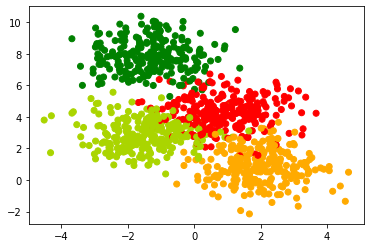

In [4]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap = my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels,2)

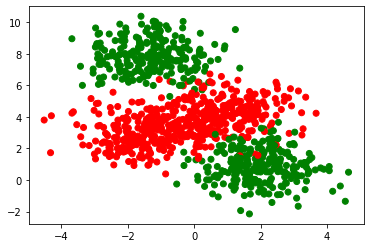

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap = my_cmap)
plt.show()

In [0]:
X_train , X_val , Y_train , Y_val = train_test_split(data,labels,stratify=labels,random_state=1)

In [0]:
class FeedforwardNN:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.w7 = np.random.randn()
        self.w8 = np.random.randn()
        self.w9 = np.random.randn()
        self.w10 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1 , self.x2 = x
        
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        
        self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
        self.h4 = self.sigmoid(self.a4)
        
        self.a5 = self.w9*self.h3 + self.w10*self.h4 + self.b5
        self.h5 = self.sigmoid(self.a5)
        return self.h5
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dw9 =  (self.h5-y)*self.h5*(1-self.h5)*self.h3
        self.dw10 = (self.h5-y)*self.h5*(1-self.h5)*self.h4
        self.db5 = (self.h5-y)*self.h5*(1-self.h5)
        
        self.dw5 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)*self.h1
        self.dw6 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)*self.h2
        self.db3 =  (self.h5-y)*self.h5*(1-self.h5)*self.w9*self.h3*(1-self.h3)
        
        self.dw7 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)*self.h1
        self.dw8 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)*self.h2
        self.db4 =  (self.h5-y)*self.h5*(1-self.h5)*self.w10*self.h4*(1-self.h4)
        
        self.dw1 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)*self.x1 
        self.dw2 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)*self.x2
        self.db1=  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w5 + self.w10*self.h4*(1-self.h4)*self.w7)*self.h1*(1-self.h1)
        
        self.dw3 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)*self.x1
        self.dw4 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)*self.x2
        self.db2 =  (self.h5-y)*self.h5*(1-self.h5)*(self.w9*self.h3*(1-self.h3)*self.w6 + self.w10*self.h4*(1-self.h4)*self.w8)*self.h2*(1-self.h2)
        
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=True,display_weight=True):
        if initialise:
            np.random.seed(0)
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.w7 = np.random.randn()
            self.w8 = np.random.randn()
            self.w9 = np.random.randn()
            self.w10 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
            self.b4 = 0
            self.b5 = 0
            
        if display_loss:
            loss={}
            
        for e in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw1 , dw2 , dw3 , dw4 , dw5 , dw6 , dw7 , dw8, dw9, dw10 , db1, db2 , db3 , db4 , db5 = [0]*15
            
            for X , Y in zip(x,y):
                self.grad(X,Y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw9
                dw9 += self.dw9
                dw10 += self.dw10
                db1 += self.db1
                db2 += self.b2
                db3 += self.db3
                db4 += self.b4
                db5 += self.b5
                
            m = x.shape[1]
            self.w1 -= lr*dw1/m
            self.w2 -= lr*dw2/m
            self.w3 -= lr*dw3/m
            self.w4 -= lr*dw4/m
            self.w5 -= lr*dw5/m
            self.w6 -= lr*dw6/m
            self.w7 -= lr*dw8/m
            self.w8 -= lr*dw8/m
            self.w9 -= lr*dw9/m
            self.w10 -= lr*dw10/m
            self.b1 -= lr*db1/m
            self.b2 -= lr*db2/m
            self.b3 -= lr*db3/m
            self.b4 -= lr*db4/m
            self.b5 -= lr*db5/m
            
            if display_loss:
                Y_pred = self.predict(x)
                loss[e] = mean_squared_error(Y_pred,y)
                
            if display_weight:
                weight_matrix = np.array([[0,self.b5 , self.w9,self.w10,0,0],[self.b3,self.w5,self.w6,self.w7,self.w8,self.b4],
                                         [self.b1,self.w1,self.w2,self.w3,self.w4,self.b2]])
                weight_matrics.append(weight_matrix)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()
            
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.forward_pass(X)
            Y_pred.append(result)
        return np.array(Y_pred)
    
    def predict_h1(self,x):
        Y_pred = []
        for X in x:
            y_pred = self.forward_pass(X)
            Y_pred.append(self.h1)
        return np.array(Y_pred)
    
    def predict_h2(self,x):
        Y_pred = []
        for X in x:
            y_pred = self.forward_pass(X)
            Y_pred.append(self.h2)
        return np.array(Y_pred)
    
    def predict_h3(self,x):
        Y_pred = []
        for X in x:
            y_pred = self.forward_pass(X)
            Y_pred.append(self.h3)
        return np.array(Y_pred)
    
    def predict_h4(self,x):
        Y_pred = []
        for X in x:
            y_pred = self.forward_pass(X)
            Y_pred.append(self.h4)
        return np.array(Y_pred)
    
    def predict_h5(self,x):
        Y_pred = []
        for X in x:
            y_pred = self.forward_pass(X)
            Y_pred.append(self.h5)
        return np.array(Y_pred)
    
    
        
        
        
        

In [0]:
weight_matrics = []
ffnn = FeedforwardNN()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


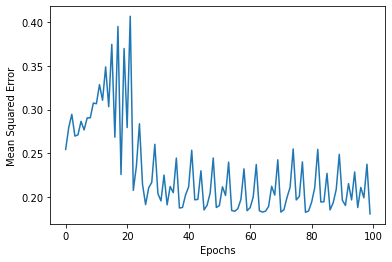

In [12]:
ffnn.fit(X_train,Y_train,epochs=100,lr=0.2)

True

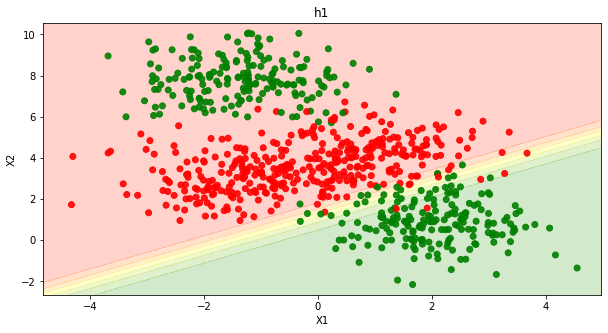

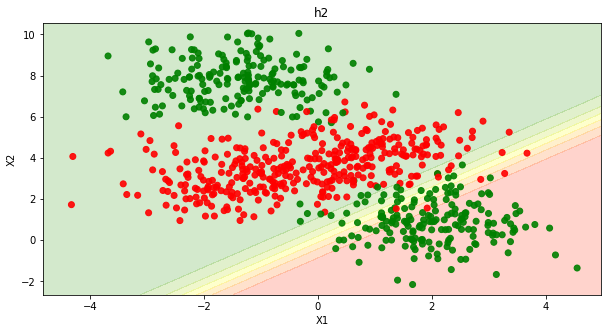

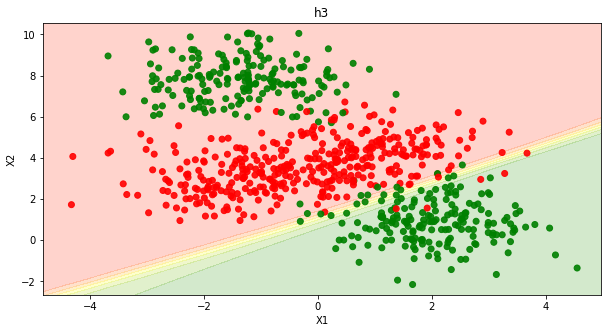

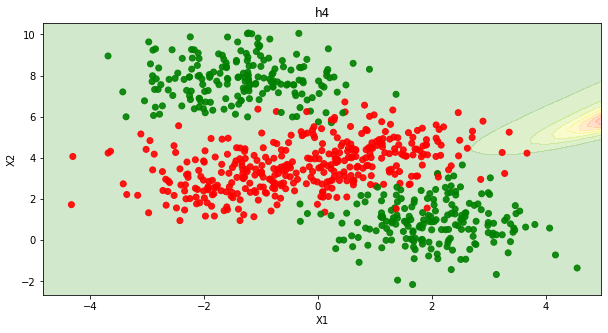

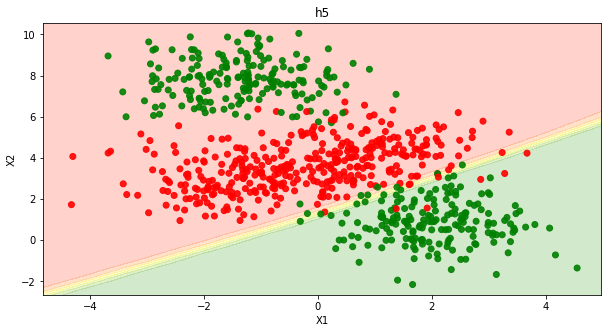

In [13]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffnn.predict_h1, ffnn.predict_h2, ffnn.predict_h3,ffnn.predict_h4 , ffnn.predict_h5]
    
    for i in range(5):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=my_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.9)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()

In [21]:
print(len(weight_matrics))

1300


In [0]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrics[epoch], annot=True, cmap=my_cmap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


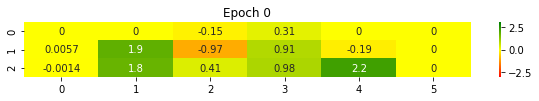

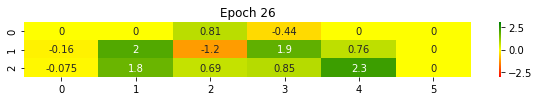

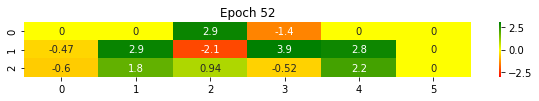

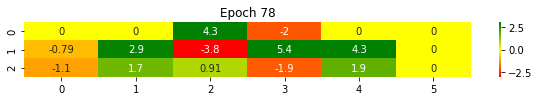

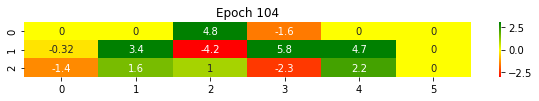

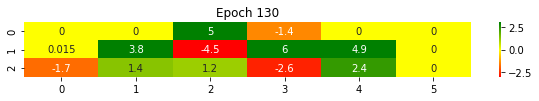

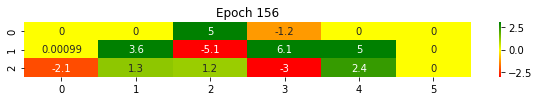

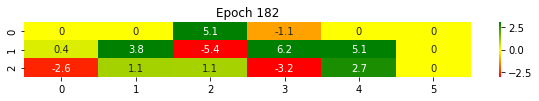

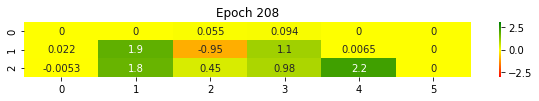

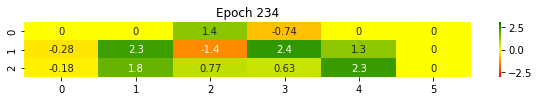

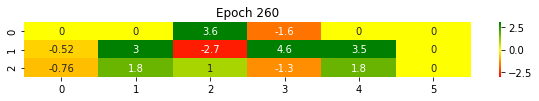

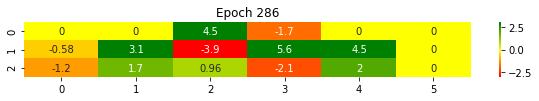

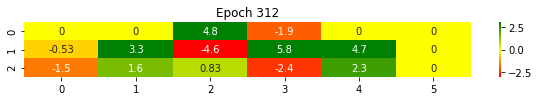

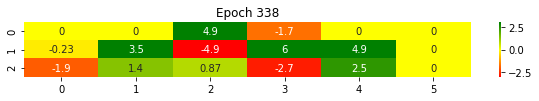

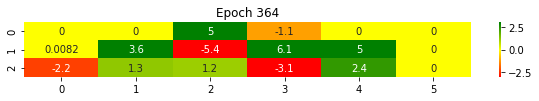

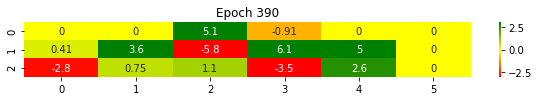

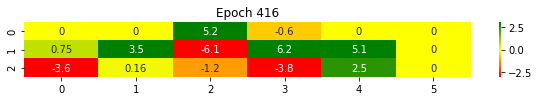

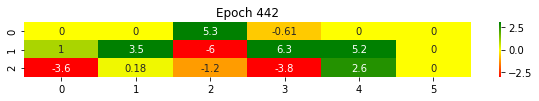

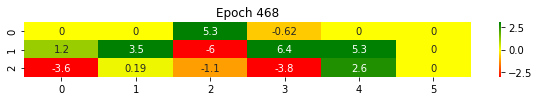

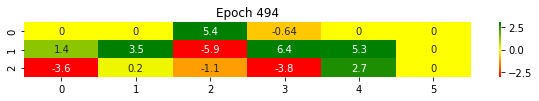

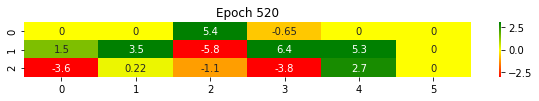

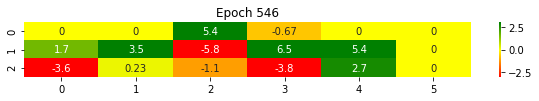

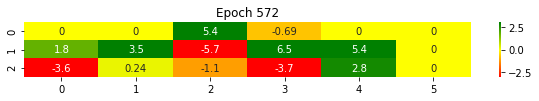

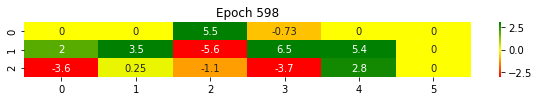

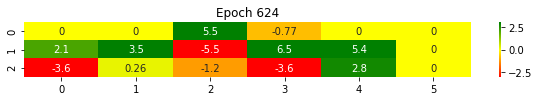

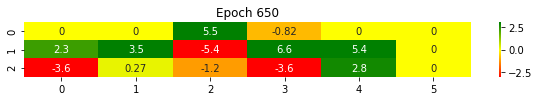

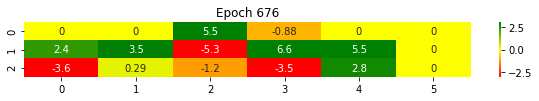

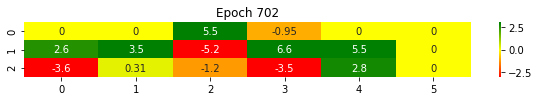

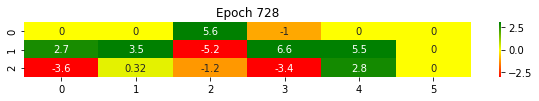

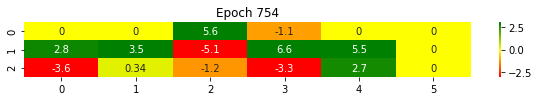

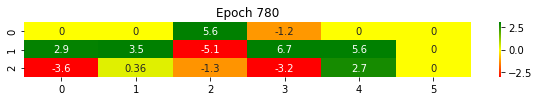

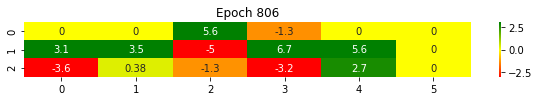

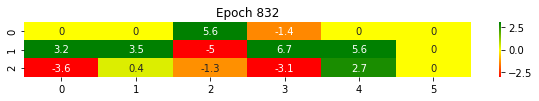

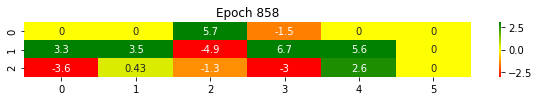

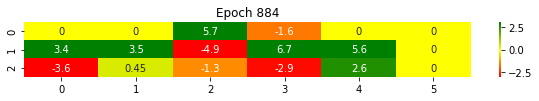

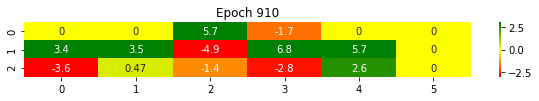

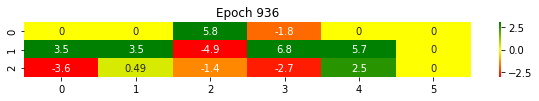

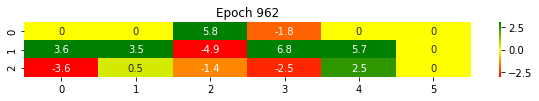

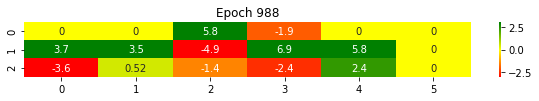

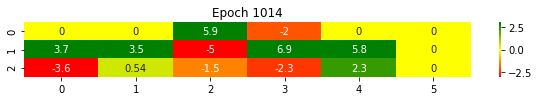

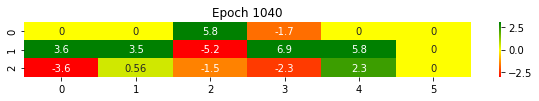

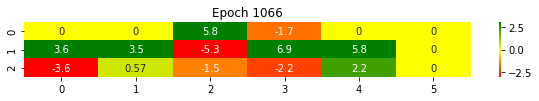

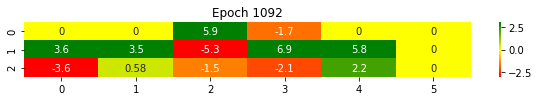

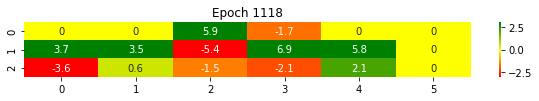

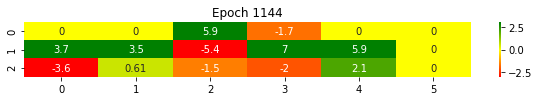

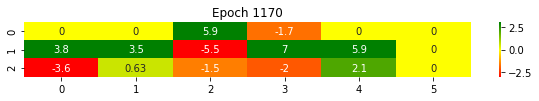

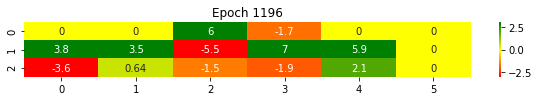

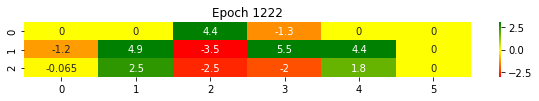

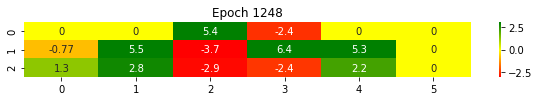

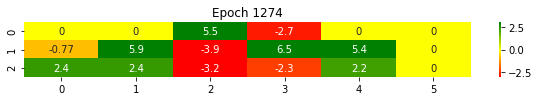

In [20]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrics),len(weight_matrics)//50)], fps=1)

In [17]:
from IPython import display
HTML('<img src="weights_viz.gif">')

In [22]:
Y_pred_train = ffnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.72
Validation accuracy 0.72


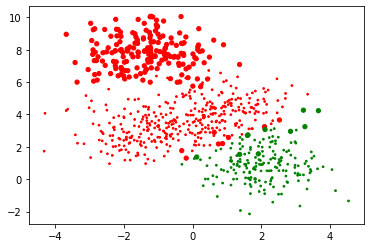

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()